# The purpose of this workbook is to analyse OpTic's performance across the major 2 qualifiers and inspect the changes in performance in relation to the match outcome

Firstly, I will load in the datasets, filter to only optic texas games and ensure that I have 3 different dataframes (one for each week)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

week1_df = pd.read_csv('../data/major2_week1_short.csv').drop(axis=1, columns='index')
week2_df = pd.read_csv('../data/major2_week2_short.csv').drop(axis=1, columns='index')
week3_df = pd.read_csv('../data/major2_week3_short.csv').drop(axis=1, columns='index')

# After reading in the data, I will convert the gametime to decimal rather than a digital clock time format
week1_df['gametime'] = week1_df['gametime'].apply(lambda x: round((int(x.split(':')[0])*60 + int(x.split(':')[1]))/60), 2)
week2_df['gametime'] = week2_df['gametime'].apply(lambda x: round((int(x.split(':')[0])*60 + int(x.split(':')[1]))/60), 2)
week3_df['gametime'] = week3_df['gametime'].apply(lambda x: round((int(x.split(':')[0])*60 + int(x.split(':')[1]))/60), 2)

week1_df.sample(5)

,player,kills,deaths,kd,hill_time,team_name,team_score,map_outcome,matchID,map_winner,mode,gametime,match_winner,first_kill,first_death,plant,defuse,captures
95,Brack,21,16,1.31,105.0,Florida Mutineers,166,loser,LAGFMW1M2,Embassy,Hardpoint,10,Los Angeles Guerrillas,NaN,NaN,NaN,NaN,NaN
52,Sib,25,23,1.09,79.0,Seattle Surge,250,winner,LVLSSW1M2,Embassy,Hardpoint,11,Las Vegas Legion,NaN,NaN,NaN,NaN,NaN
213,Drazah,17,24,0.71,NaN,Los Angeles Thieves,2,loser,NYSLATW1M2,Fortress,Control,12,New York Subliners,NaN,NaN,NaN,NaN,4
193,Priestahh,23,21,1.10,47.0,New York Subliners,184,loser,NYSLATW1M2,Fortress,Hardpoint,10,New York Subliners,NaN,NaN,NaN,NaN,NaN
314,JoeDeceives,20,31,0.65,NaN,Los Angeles Guerrillas,1,loser,LAGLATW1M2,Fortress,Control,12,Los Angeles Guerrillas,NaN,NaN,NaN,NaN,2


Because I am only looking at optic matches, I will first of all find all of the MatchID's for OpTic's game.

      player  kills  deaths    kd  hill_time     team_name  team_score  \
304    iLLeY   24.0    28.0  0.86       54.0   OpTic Texas       189.0   
305  Shotzzy   24.0    26.0  0.92       33.0   OpTic Texas       189.0   
306    Dashy   32.0    24.0  1.33       68.0   OpTic Texas       189.0   
307     Huke   23.0    28.0  0.82       35.0   OpTic Texas       189.0   
308   Celium   31.0    19.0  1.63       62.0  Atlanta FaZe       250.0   
309     Simp   28.0    30.0  0.93       65.0  Atlanta FaZe       250.0   
310    aBeZy   24.0    29.0  0.83       75.0  Atlanta FaZe       250.0   
311  SlasheR   23.0    25.0  0.92       78.0  Atlanta FaZe       250.0   
328    iLLeY   24.0    28.0  0.86       87.0   OpTic Texas       250.0   
329  Shotzzy   25.0    31.0  0.81       75.0   OpTic Texas       250.0   
330    Dashy   41.0    23.0  1.78      102.0   OpTic Texas       250.0   
331     Huke   22.0    26.0  0.85       59.0   OpTic Texas       250.0   
332   Celium   22.0    26.0  0.85     

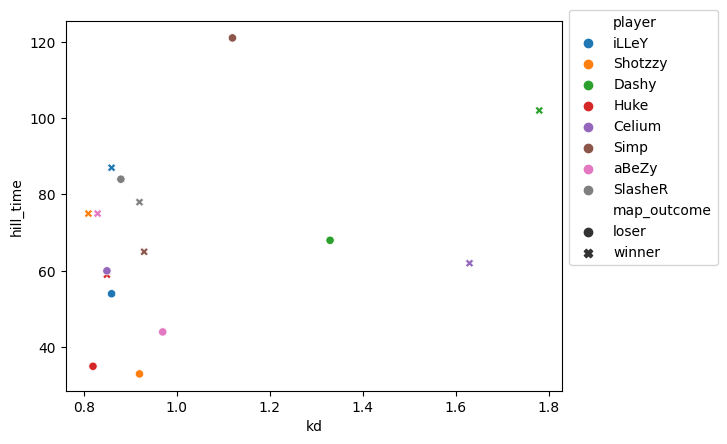

In [66]:
def filter_teams_games(dataframe: pd.DataFrame, team_name: str):
    match_ids = dataframe[dataframe['team_name']==team_name]['matchID'].unique()
    team_df = dataframe[dataframe['matchID'].isin(match_ids)]
    return team_df

optic_w1 = filter_teams_games(week1_df, 'OpTic Texas')
optic_w2 = filter_teams_games(week2_df, 'OpTic Texas')
optic_w3 = filter_teams_games(week3_df, 'OpTic Texas')

faze_optic_hp = optic_w3.where(optic_w3.matchID == 'OTAFW3M2').where(optic_w3['mode']=='Hardpoint').dropna(how='all')
print(faze_optic_hp)
sns.scatterplot(data=faze_optic_hp, x='kd', y='hill_time', hue='player', style='map_outcome')
plt.legend(bbox_to_anchor=(1, 1.05));
